# Lab 2 (Part A) - Introduction to gradient descent

This part of the Lab is a step by step introduction to the gradient descent algorithm. It will help you understand how it works. Make sure that you check the videos of lecture 2 before starting this Lab:
- Introduction to Linear Regression: https://www.youtube.com/watch?v=-wmjwMWRsZU&list=PLS8J_PRPtGfdnPf9QqT7Itnn2rAHsoWqY&index=3
- Introduction to Nonlinear Regression: https://www.youtube.com/watch?v=Hyu8QMLEHrE&list=PLS8J_PRPtGfdnPf9QqT7Itnn2rAHsoWqY&index=4

First, please select the Python code cell below and run it to initialize some plots. You DO NOT have to understand the code in this cell.

In [11]:
# Always run this cell before anything else. DO NOT modify this code.
%matplotlib inline
import numpy as np
import sys
sys.path.insert(0, 'labutils/')

from lab2utils import lab2partA1, lab2partA2
lab2A1, lab2A2 = lab2partA1(), lab2partA2()

In [12]:
from IPython import get_ipython

# 1. Minimizing a function of one parameter with gradient descent

In this section, you are given a function $F(a) = (a + 5)^2$ of one parameter $a$ (a scalar value). The goal is to minimize the function $F$ using the gradient descent algorithm.

You are asked to read and complete the Python code below to perform gradient descent (read carefully the code, the comments, and the *TODO* comments in red). The function `dF(a)` that you should complete corresponds to $\frac{\partial F(a)}{\partial a}$, i.e., the derivative of the function $F(a)$ with respect to the parameter $a$.

If your implementation of gradient descent is correct and the value of $\alpha$ is correctly choosen, then the value of $a$ should approach $-5$ and the value of $F(a)$ should approach $0$. This is because the minimum of the function $F(a)$ is $0$ when $a = -5$.

Once your code works well, you can re-run it with different values of the learning rate $\alpha$ and see the difference in terms of the number of iterations it takes until convergence. For example, you can try the following values for $\alpha$: 0.01, 0.3, and 0.9. Please note that if your learning rate $\alpha$ is too large (e.g. $\alpha = 1.5$ for this example), then $F(a)$ can **diverge** and *blow up*, resulting in values which are too large for computer calculations. If your value of $F(a)$ increases or even blows up, stop the execution, adjust your learning rate and try again.

You can also re-run the code with a different initial value for the parameter $a$. For example, you can try an initial value of $a = 0$ or $a = -15$.

Number of iterations 1
a is -5.0
F(a) is 0.0


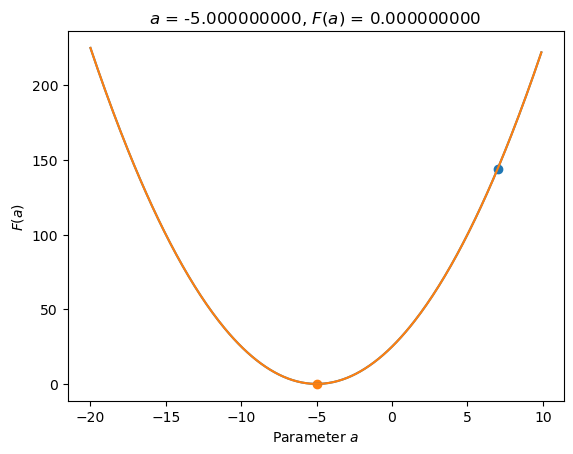

In [13]:

def F(a):
    return (a + 5)**2


def dF(a):
    derivative=2*(a+5)
    return derivative


alpha = 0.5            
a = 7                  
max_iterations = 100   
epsilon = 0.0001       # Some small number to test for convergence (i.e. to stop if F(a) does not decrease too much)

for itr in range(max_iterations):
    lab2A1.plot(itr, F, a) # This plots an animation (DO NOT modify this line)
    prev = F(a) # Save the value of F(a)
    

    # Gradient Descent Update
    a = a - alpha * dF(a)

    current = F(a)  # Calculate the value of F(a) after the update

    # Check for convergence
    
    CONDITION = abs(prev - current) < epsilon
    if CONDITION:
        print('Number of iterations', itr)
        print('a is', a)
        print('F(a) is', F(a))
        break


# 2. Minimizing a function of two parameters with gradient descent

In this section, you are given a function $F(a, b) = 5 + a^2 + \frac{3}{2} b^2 + a b~$ of two parameters $a$ and $b$ (scalar values). The goal is to minimize the function $F(a, b)$ using the gradient descent algorithm.

You are asked to read and complete the Python code below to perform gradient descent (read carefully the code, the comments, and the *TODO* comments in red). The first function `dFa(a, b)` that you should complete corresponds to $\frac{\partial F(a, b)}{\partial a}$, i.e., the derivative of the function $F(a, b)$ with respect to the first parameter $a$. The second function `dFb(a, b)` that you should complete corresponds to $\frac{\partial F(a, b)}{\partial b}$, i.e., the derivative of the function $F(a, b)$ with respect to the second parameter $b$.

Note that $\frac{\partial F(a, b)}{\partial a} = 2 a + b$, and $\frac{\partial F(a, b)}{\partial b} = 3 b + a$.

If your implementation is correct and the value of $\alpha$ is correctly chosen, then the value of both $a$ and $b$ should approach $0$ and the value of $F(a, b)$ should approach $5$. This is because the minimum of the function $F(a, b)$ is $5$ when $a = 0$ and $b = 0$.

Once your code works well, you can re-run it with different values of the learning rate $\alpha$, and different values of the initial parameters $a$ and $b$.

Number of iterations 8
a is -0.0006866455078125
b is -0.00034332275390625
F(a,b) is 5.00000088402885


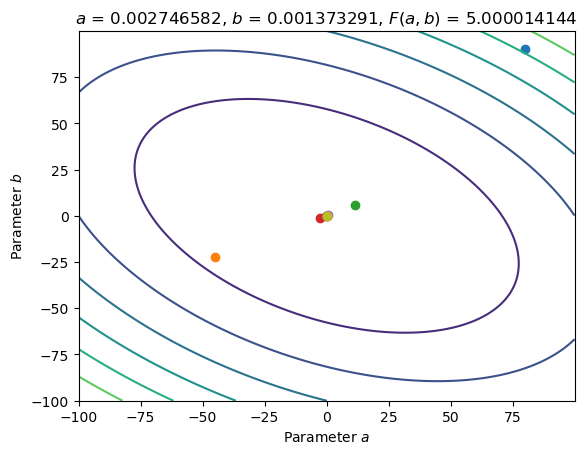

In [14]:
# DO NOT modify the definition of the function F(a, b)
def F(a, b):
    return 5 + a**2 + 1.5 * b**2 + a * b


def dFa(a, b):
    # Derivative of F with respect to a
    return 2*a + b


def dFb(a, b):
    # Derivative of F with respect to b
    return 3*b + a


alpha = 0.5            # The learning rate of gradient descent
a, b = 80, 90          # The initial values of a and b (any initial values are ok)
max_iterations = 100   # Maximum number of iterations
epsilon = 0.0001       # Some small number to test for convergence (i.e. to stop if F(a) does not decrease too much)

for itr in range(max_iterations):
    lab2A2.plot(itr, F, a, b) # This plots an animation (DO NOT modify this line)
    prev = F(a, b) # Save the value of F(a, b)
  
    # Gradient Descent Update
    a = a - alpha * dFa(a, b)
    b = b - alpha * dFb(a, b)
    
    current = F(a, b)
    
    CONDITION = abs(prev - current) < epsilon
    if CONDITION:
        print('Number of iterations', itr)
        print('a is', a)
        print('b is', b)
        print('F(a,b) is', F(a,b))
        break
        

# 3. Minimizing a function of multiple parameters with gradient descent

This section is similar to the previous one, but you will minimize a function of multiple parameters (i.e., a vector of $p$ parameters: $\theta \in \mathbb{R}^p$).

First, you are asked to write the function $F(\theta)$ in the following Python code. The function $F(\theta)$ is defined as:
$$F(\theta) = \sum_{j} \theta_j^2$$

The gradient of the function $F(\theta)$ is denoted as $\nabla F(\theta)$. This is a vector containing the derivative of $F(\theta)$ with respect to each parameter $\theta_j$:
$$\nabla F(\theta) = \left ( \frac{\partial F(\theta)}{\partial \theta_0}, \frac{\partial F(\theta)}{\partial \theta_1}, \frac{\partial F(\theta)}{\partial \theta_2}, \dots \right )$$ 

Write the definition of the function `gradF(theta)` in the following Python code. This function corresponds to $\nabla F(\theta)$. It should return an array containing the derivative of $F(\theta)$ with respect to each parameter $\theta_j$.

If your implementation is correct and the value of $\alpha$ is correctly chosen, then you should end up getting all parameter values close to $0$ and the value of $F(\theta)$ should approach $0$. This is because the minimum of the function $F(\theta)$ is $0$ when $\theta = \vec{0} $ (the null vector).

Once your code works well, you can re-run it with a different value of the learning rate $\alpha$, and a different initial parameters vector $\theta$.

iteration = 52, theta = [ 0.00058  0.00066 -0.00015], F(theta) = 0.000001


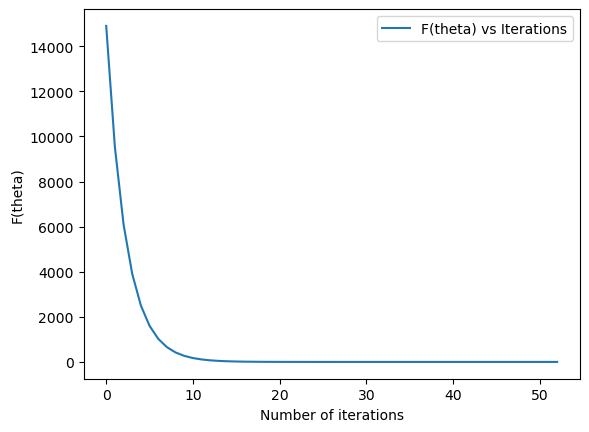

In [15]:
import numpy as np, matplotlib.pylab as plt

def F(theta):
    return np.sum(theta ** 2)


def gradF(theta):
    return 2 * theta


alpha = 0.1                      # The learning rate of gradient descent
theta = np.array([80, 90, -20])  # Some initial parameters vector: theta = [theta_0, theta_1, theta_2, ...]
max_iterations = 100             # Maximum number of iterations
epsilon = 0.000001               # Some small number to test for convergence (i.e. to stop if F(a) does not decrease too much)

# List to store the values of F(theta)
history_F_theta = []

for itr in range(max_iterations):
    prev = F(theta)
    #print("iteration = {}, theta = {}, F(theta) = {}".format(itr, theta, prev))
    
    # Gradient Descent Update
    theta = theta - alpha * gradF(theta)
    
    # Append the current value of F(theta) to the history list
    history_F_theta.append(prev)
    
    CONDITION = len(history_F_theta) > 1 and abs(history_F_theta[-1] - history_F_theta[-2]) < epsilon
    if CONDITION:
        np.set_printoptions(precision=5, suppress=True)
        print("iteration = {}, theta = {}, F(theta) = {:.6f}".format(itr, theta, prev))
        break

#plot f(theta) over iterations
fig, ax = plt.subplots()
ax.plot(range(itr + 1), history_F_theta, label='F(theta) vs Iterations')
ax.set_xlabel("Number of iterations")
ax.set_ylabel("F(theta)")
ax.legend()
plt.show()